In [ ]:
 
#!pip install matplotlib
#!pip install numpy
#!pip install scipy
#!pip install scikit-image
#!pip install pandas

In [2]:
import AFM_Tools as afm
import matplotlib.pyplot as plt

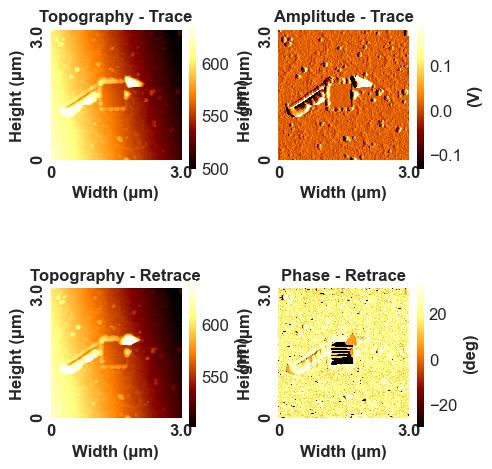

In [3]:
#images=loadMI('E5__240703_114329.mi')
images =afm.loadMI('Disk_250509_164728.mi')
afm.AFMPlot(images, figsize=(5, 5))   

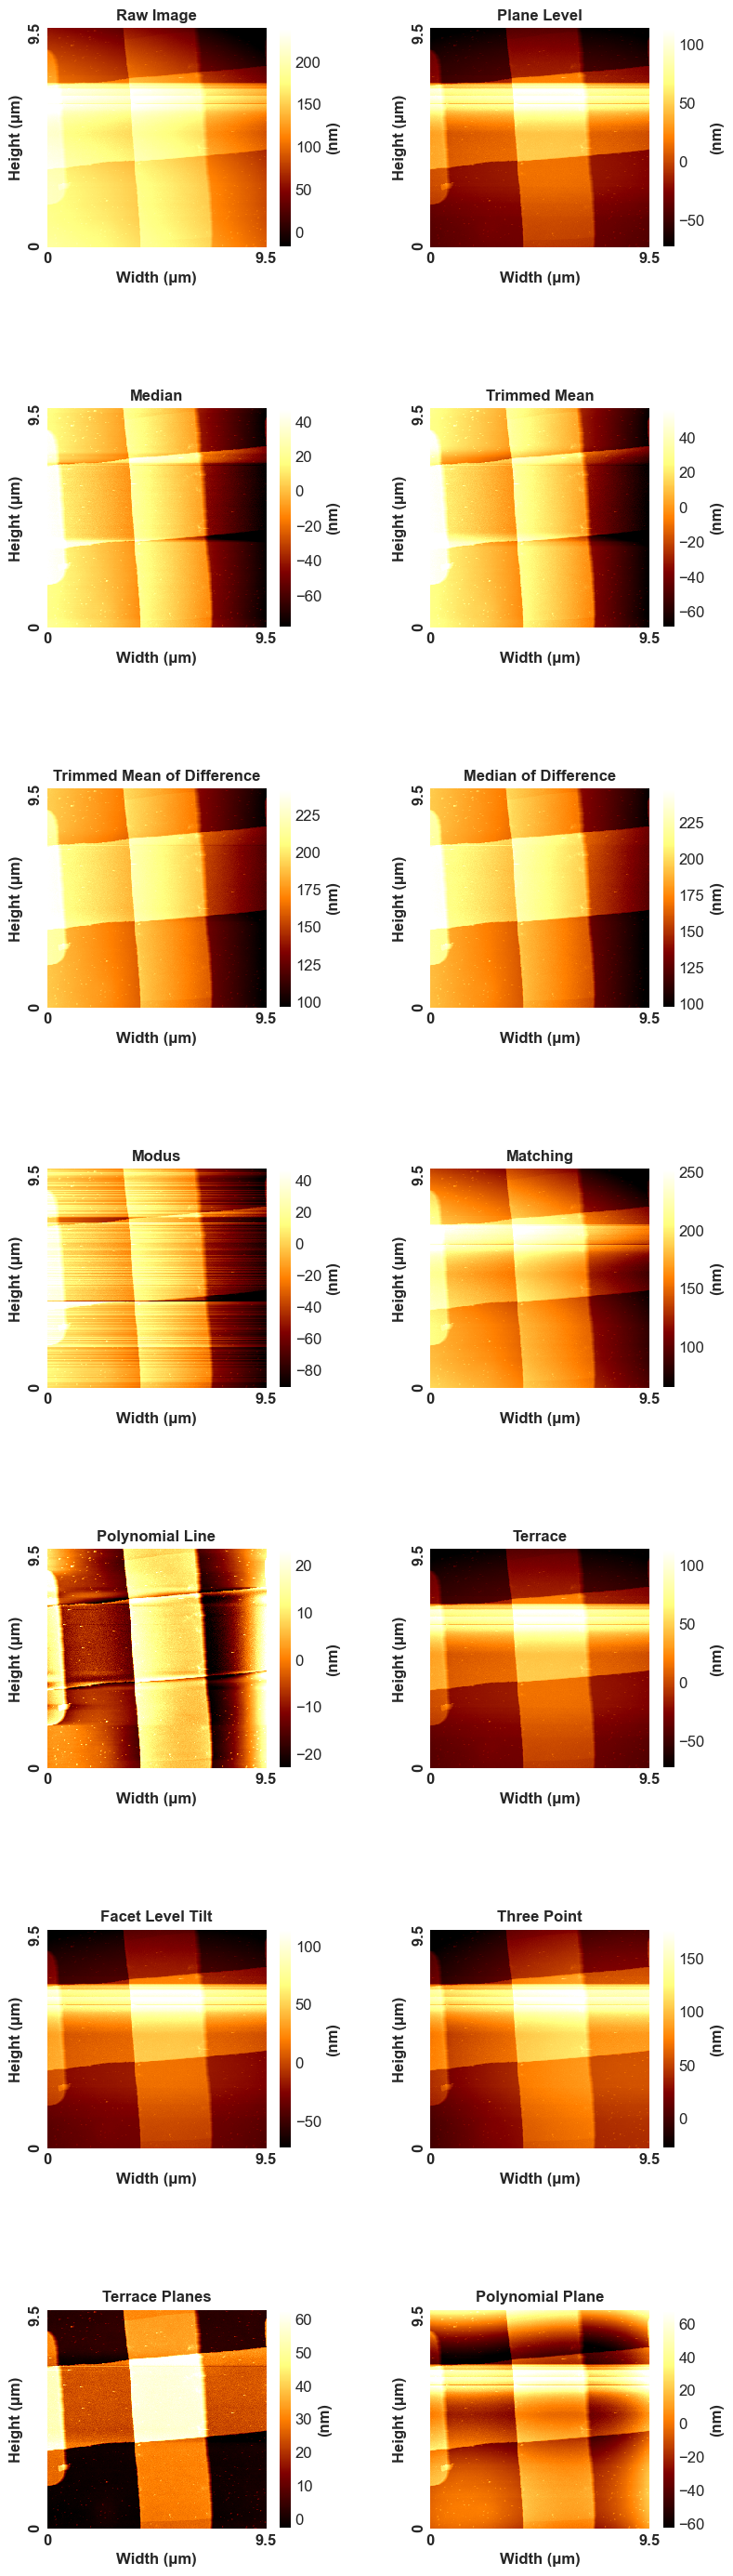

In [4]:
images=afm.loadMI('E5__240703_114329.mi')
topographyImage= images ['images']['Topography_Trace']
fig, ax = plt.subplots(7, 2,figsize=(8, 7*4))
ax=ax.flatten()
afm.AFMPlot(topographyImage, fig=fig, ax=ax[0], title='Raw Image') 
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.PlaneLevel), fig=fig, ax=ax[1], title='Plane Level')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.Median), fig=fig, ax=ax[2], title='Median')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.TrimmedMean), fig=fig, ax=ax[3], title='Trimmed Mean')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.TrimmedMeanOfDifference,trim_ratio=0.11), fig=fig, ax=ax[4], title='Trimmed Mean of Difference')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.MedianOfDifference), fig=fig, ax=ax[5], title='Median of Difference')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.Modus), fig=fig, ax=ax[6], title='Modus')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.Matching), fig=fig, ax=ax[7], title='Matching')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.PolynomialLine, degree=3), fig=fig, ax=ax[8], title='Polynomial Line')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.TerraceLine), fig=fig, ax=ax[9], title='Terrace')
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.FacetLevelTilt), fig=fig, ax=ax[10], title='Facet Level Tilt')




rows, cols = topographyImage['img'].shape
p1 = (0, 0 )
p2 = (cols-1, 0 )
p3 = (0, rows-1)
    
afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.ThreePoint,p1=p1,p2=p2,p3=p3), fig=fig, ax=ax[11], title='Three Point')

lineFlattenedImage = afm.FlattenImage(topographyImage,afm.AFMFlatteningMethod.TrimmedMeanOfDifference,trim_ratio=.1)
leastSquarePlane = afm.FlattenImage(lineFlattenedImage, afm.AFMFlatteningMethod.PlaneLevel,fit_method= afm.RegressionMethod.LEAST_SQUARES)
terrace = afm.FlattenImage(leastSquarePlane, afm.AFMFlatteningMethod.TerracePlanes)
terrace = afm.ZeroImageToFloor(terrace)
afm.AFMPlot(terrace, fig=fig, ax=ax[12], title='Terrace Planes')

afm.AFMPlot(afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.polynomialPlaneFlattening, xdegree=3, ydegree=3), fig=fig, ax=ax[13], title='Polynomial Plane')
fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show() 



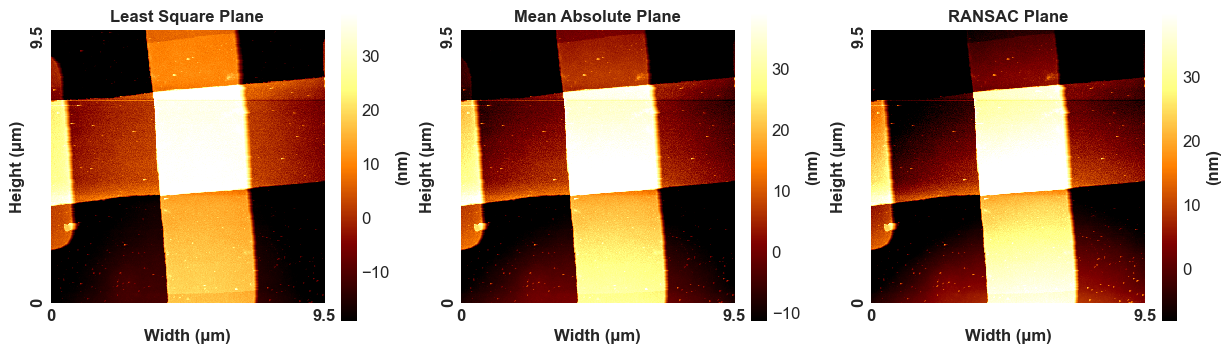

In [5]:
images =afm.loadMI('E5__240703_114329.mi')
topographyImage= images ['images']['Topography_Trace']
fig,ax=plt.subplots(1,3,figsize=(15,5))
lineFlattenedImage = afm.FlattenImage(topographyImage,afm.AFMFlatteningMethod.TrimmedMeanOfDifference,trim_ratio=.1)
leastSquarePlane = afm.FlattenImage(lineFlattenedImage, afm.AFMFlatteningMethod.PlaneLevel,fit_method= afm.RegressionMethod.LEAST_SQUARES)
afm.AFMPlot(leastSquarePlane,fig=fig,ax=ax[0],title='Least Square Plane',vrange=[25,95])
meanAbsolutePlane = afm.FlattenImage(lineFlattenedImage, afm.AFMFlatteningMethod.PlaneLevel,fit_method= afm.RegressionMethod.ABSOLUTE_DEVIATION)
afm.AFMPlot(meanAbsolutePlane,fig=fig,ax=ax[1],title='Mean Absolute Plane',vrange=[25,95])
ransacPlane = afm.FlattenImage(lineFlattenedImage, afm.AFMFlatteningMethod.PlaneLevel,fit_method= afm.RegressionMethod.RANSAC)
afm.AFMPlot(ransacPlane,fig=fig,ax=ax[2],title='RANSAC Plane',vrange=[25,95])
plt.show()

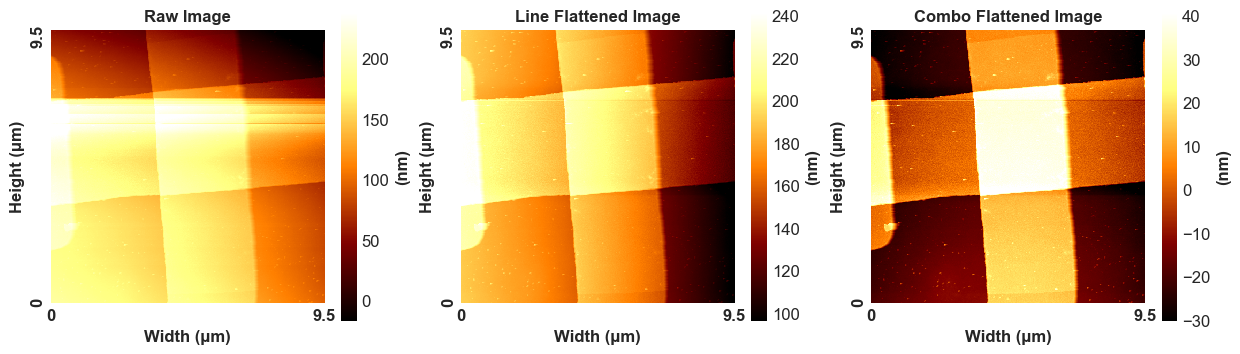

In [6]:
images=afm.loadMI('E5__240703_114329.mi')
topographyImage= images ['images']['Topography_Trace']
fig,ax=plt.subplots(1,3,figsize=(15,5))

topographyImage= images ['images']['Topography_Trace']
lineFlattenedImage = afm.FlattenImage(topographyImage,afm.AFMFlatteningMethod.TrimmedMeanOfDifference,trim_ratio=.1)
planeFlattenedImage = afm.FlattenImage(lineFlattenedImage,afm.AFMFlatteningMethod.TerraceLine)
afm.AFMPlot(topographyImage,  fig=fig, ax=ax[0], title='Raw Image')
afm.AFMPlot(lineFlattenedImage,  fig=fig, ax=ax[1], title='Line Flattened Image')
afm.AFMPlot(planeFlattenedImage,   fig=fig, ax=ax[2], title='Combo Flattened Image')

plt.show()

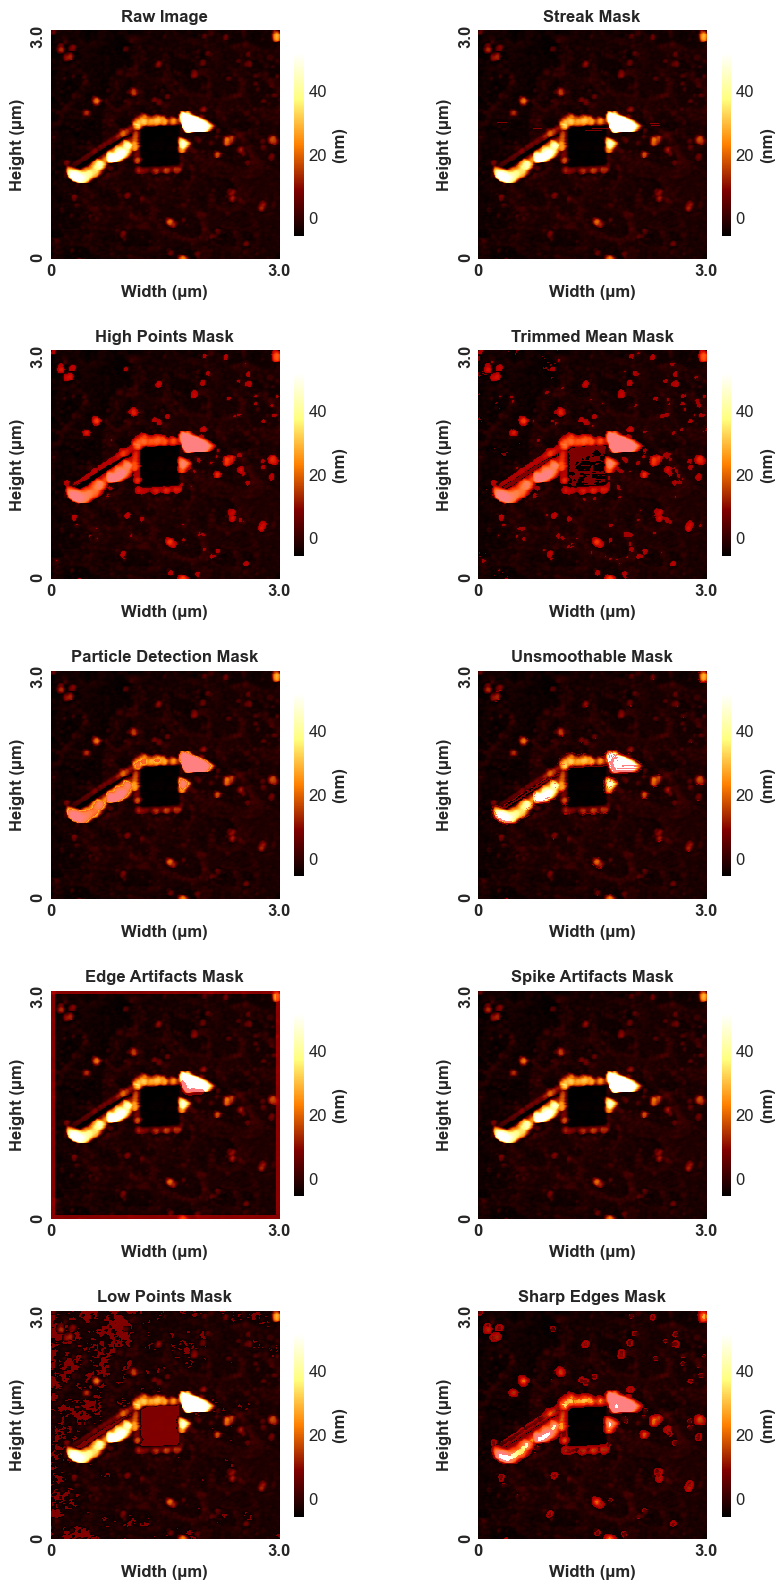

In [7]:
images=afm.loadMI('Disk_250509_164728.mi')
topographyImage= images ['images']['Topography_Trace']
fig, ax = plt.subplots(5, 2,figsize=(8, 4*4))
ax=ax.flatten()

planedTopographyImage = afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.PlaneLevel)
afm.AFMPlot(planedTopographyImage, fig=fig, ax=ax[0], title='Raw Image') 
# Create a grid to showcase different mask types
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.StreakMask), fig=fig, ax=ax[1], title='Streak Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.HighPoints), fig=fig, ax=ax[2], title='High Points Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.TrimmedMean), fig=fig, ax=ax[3], title='Trimmed Mean Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.ParticleDetection), fig=fig, ax=ax[4], title='Particle Detection Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.Unsmoothable), fig=fig, ax=ax[5], title='Unsmoothable Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.EdgeArtifacts), fig=fig, ax=ax[6], title='Edge Artifacts Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.SpikeArtifacts), fig=fig, ax=ax[7], title='Spike Artifacts Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.LowPoints), fig=fig, ax=ax[8], title='Low Points Mask')
afm.AFMPlot(planedTopographyImage, mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.SharpEdges), fig=fig, ax=ax[9], title='Sharp Edges Mask')        
 
fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show() 


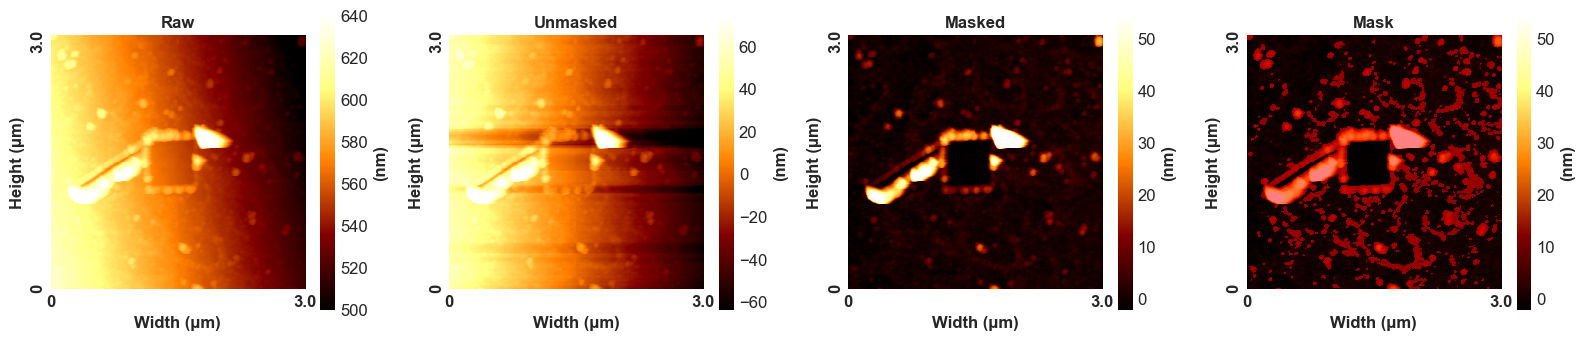

In [8]:
images =afm.loadMI('Disk_250509_164728.mi')
topographyImage= images ['images']['Topography_Trace']
planedTopographyImage = afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.PlaneLevel)
mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.HighPoints, threshold_percentile=75)   
maskImage = afm.FlattenImage(planedTopographyImage, afm.AFMFlatteningMethod.Median, mask=mask)
unmaskedImage = afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.Median)

fig, ax = plt.subplots(1, 4,figsize=(16, 4))
afm.AFMPlot(topographyImage, title='Raw', fig=fig, ax=ax[0])
afm.AFMPlot(unmaskedImage,  title='Unmasked', fig=fig, ax=ax[1])
afm.AFMPlot(maskImage,  title='Masked', fig=fig, ax=ax[2])    
afm.AFMPlot(maskImage, mask=mask,  title='Mask', fig=fig, ax=ax[3])

plt.tight_layout()
plt.show()


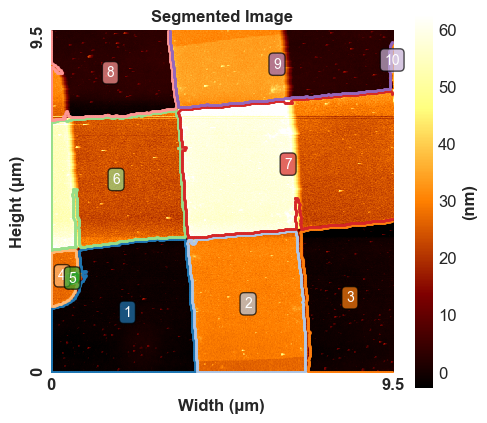

,Region,Avg Height (nm),RMS Rough (nm),Mean Rough (nm),Skewness,Kurtosis,Area (um²),Avg Slope (nm),Max Height (nm),Pit Depth (nm)
0,1,-1.0820,1.2199,0.6267,6.08,59.22,12.45,0.3993,23.6906,2.1591
1,2,29.6980,1.5242,1.0541,0.30,7.81,11.40,0.7298,18.2058,8.2679
2,3,-0.7235,1.8201,0.9298,1.07,14.06,9.72,0.5007,17.9707,7.1319
3,4,27.3076,1.1502,0.8522,1.29,5.55,0.88,0.8971,8.6488,4.0365
4,5,42.6214,3.1629,2.6109,0.99,0.27,0.05,1.3840,9.8738,3.9175
5,6,29.7502,11.7860,8.9852,1.64,0.99,12.29,1.4409,48.6870,11.4939
6,7,42.9874,16.6103,16.2628,-0.14,-1.84,20.42,1.1536,55.7209,32.2235
7,8,4.2344,6.7641,3.5196,3.25,9.82,7.73,0.5386,41.5260,7.8400
8,9,19.9242,15.1959,14.9493,-0.20,-1.90,11.34,0.6439,33.0386,18.5603
9,10,33.0961,1.1930,0.9255,0.86,0.60,0.02,1.5362,3.6206,2.3551


In [9]:
#
images=afm.loadMI('E5__240703_114329.mi')
topographyImage= images ['images']['Topography_Trace']

lineFlattenedImage = afm.FlattenImage(topographyImage,afm.AFMFlatteningMethod.TrimmedMeanOfDifference,trim_ratio=.1)
leastSquarePlane = afm.FlattenImage(lineFlattenedImage, afm.AFMFlatteningMethod.PlaneLevel,fit_method= afm.RegressionMethod.LEAST_SQUARES)
terrace = afm.FlattenImage(leastSquarePlane, afm.AFMFlatteningMethod.TerracePlanes)
terrace = afm.ZeroImageToFloor(terrace)

# Segment the image
seg_results = afm.segment_afm_image(terrace , method=afm.EdgeDetectionMethod.Sobel,kernel_scale_factor=.05 )
segmentReport = afm.AnalyzeSegments(terrace, seg_results)
afm.AFMPlot(terrace, title='Segmented Image', segments=seg_results, show_region_labels=True, figsize=(5, 5))
segmentReport


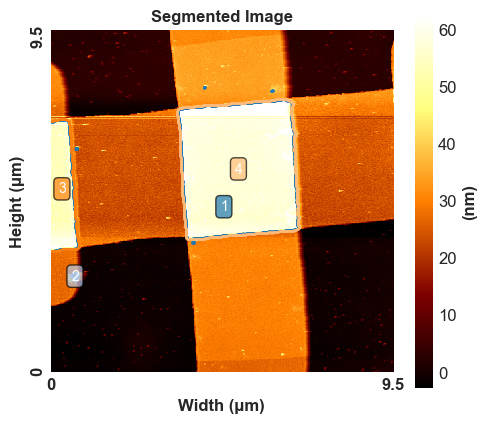

,Region,Avg Height (nm),RMS Rough (nm),Mean Rough (nm),Skewness,Kurtosis,Area (um²),Avg Slope (nm),Max Height (nm),Pit Depth (nm)
0,1,15.1060,14.1313,13.6163,-0.03,-1.74,76.41,1.0055,48.4837,23.1186
1,2,46.4971,2.8773,2.4310,0.54,-0.70,0.02,2.2894,6.6767,4.5372
2,3,54.4555,3.6956,2.3635,0.41,6.36,2.31,1.5721,23.9816,15.8281
3,4,58.1333,3.2724,1.8895,0.00,14.29,11.37,1.2838,40.6893,26.0315


In [10]:

images=afm.loadMI('E5__240703_114329.mi')
topographyImage= images ['images']['Topography_Trace']

lineFlattenedImage = afm.FlattenImage(topographyImage,afm.AFMFlatteningMethod.TrimmedMeanOfDifference,trim_ratio=.1)
leastSquarePlane = afm.FlattenImage(lineFlattenedImage, afm.AFMFlatteningMethod.PlaneLevel,fit_method= afm.RegressionMethod.LEAST_SQUARES)
terrace = afm.FlattenImage(leastSquarePlane, afm.AFMFlatteningMethod.TerracePlanes)
terrace = afm.ZeroImageToFloor(terrace)

# Segment the image
seg_results = afm.segment_afm_image_height(terrace  )
segmentReport =afm. AnalyzeSegments(terrace, seg_results)
afm.AFMPlot(terrace, title='Segmented Image', segments=seg_results, show_region_labels=True, figsize=(5, 5))
segmentReport

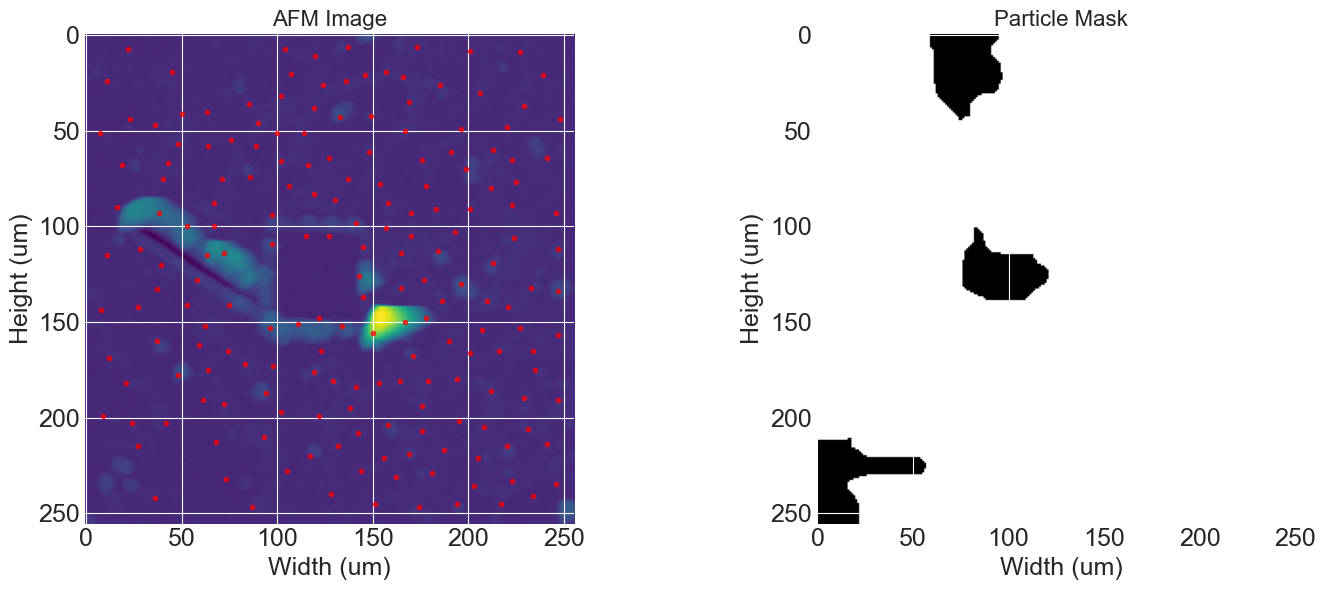

,segment_id,num_particles,avg_size (nm²),avg_height (nm),std_size (nm²),std_height (nm),avg_interparticle_distance (nm),std_interparticle_distance (nm)
0,whole_image,190,44869.031404,11.104772,25915.370139,18.455783,1455.09929,686.305881


In [11]:
images =afm.loadMI('Disk_250509_164728.mi')
topographyImage= images ['images']['Topography_Trace']
planedTopographyImage = afm.FlattenImage(topographyImage, afm.AFMFlatteningMethod.PlaneLevel)
mask = afm.AutoMask(planedTopographyImage, method=afm.AFMMaskGenerator.HighPoints, threshold_percentile=75)   
maskImage = afm.FlattenImage(planedTopographyImage, afm.AFMFlatteningMethod.Median, mask=mask)

# Example usage
particles = afm.particle_analysis(maskImage)


# Set up figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot original image
axes[0].imshow(maskImage['img'], cmap='viridis')
axes[0].set_title('AFM Image', fontsize=16)
axes[0].set_xlabel(f"Width ({maskImage['widthUnit']})")
axes[0].set_ylabel(f"Height ({maskImage['heightUnit']})")

# Plot particle mask
axes[1].imshow(particles['mask'], cmap='gray')
axes[1].set_title('Particle Mask', fontsize=16)
axes[1].set_xlabel(f"Width ({maskImage['widthUnit']})")
axes[1].set_ylabel(f"Height ({maskImage['heightUnit']})")

# Mark particle locations on the original image
for y, x in particles['locations']:
    # Flip y coordinate to match image orientation
    rows = maskImage['img'].shape[0]
    axes[0].plot(x, y, 'ro', markersize=3, alpha=0.7)

plt.tight_layout()
plt.show()

# Display particle analysis results
particles['data']